### Problem statement: 
Analyzed the medical Electronic Health Records data using Machine Learning. In this project I am trying to solve and identify the percentage of effect BMX index on each patient health. By using machine learning, I will find out the maximum threshold BMX value needed for any patient based on the age, height, and weight. It will help to minimize the deaths occuring due to the excess BMX value. Algorithms used for this project are Random Forest, Gradient Boosting and created the hypothesis, t-statistic, confusion matrix to identify the patterns.

### Installing Libraries¶
- pip install pandas
- pip install numpy
- pip install scipy
- pip install sklearn
- pip install datetime
- pip install matplotlib

In [ ]:
 packages
from osgeo import gdal, ogr, gdal_array # I/O image data
import numpy as np # math and array handling
import matplotlib.pyplot as plt # plot figures
from sklearn.ensemble import RandomForestClassifier # classifier
import pandas as pd # handling large data as table sheets
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix  # calculating measures for accuracy assessment

import seaborn as sn

import datetime

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

###### Hypothesis testing
- Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data.
- Hypothesis Testing is basically an assumption that we make about the population parameter.
Ex : Avg cars in texas are 40000 or a boy is taller than girls.
- All those example we assume need some statistic way to prove those. we need some mathematical conclusion what ever we are assuming is true. 
- It is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. 
- When we say that a finding is statistically significant, it’s thanks to a hypothesis test.
- The basic of hypothesis is normalisation and standard normalisation, all our hypothesis revolve around basic of these 2 terms.

###### Null Hypothesis:
Null hypothesis will state that the two populations being tested have no statistically significant difference. 
In inferential statistics, the null hypothesis is a general statement or default position that there is no 
relationship between two measured phenomena, or no association among groups. In other words it is a basic assumption 
or made based on domain or problem knowledge.

Example : a company production is = 50 unit/per day etc.


###### Alternate Hypothesis:
The alternate hypothesis will state that there is one difference present in the data.
The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. 
It is usually taken to be that the observations are the result of a real effect (with some amount of chance 
variation superposed)

###### T-Statistic:

The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different 
from each other.The t test also tells you how significant the differences are not .

Example : a company production is !=50 unit/per day etc.

###### Statistical Test 
- uses the data obtained from a sample to make a decision about whether the null hypothesis should be rejected.

###### Test Value (test statistic) 
- the numerical value obtained from a statistical test. 

When we make a conclusion from a statistical test there are two types of errors that we could make. They are called: Type I and Type II Errors.
- Type I error – reject H0 when H0 is true.
- Type II error – do not reject H0 when H0 is false

###### Critical Value (CV)
- separates the critical region from the non-critical region, i.e., when we should reject H0 from when we should not reject H0. 


### Question 1:
##### Do males have a significantly higher mean Body Mass Index than females? Data is collected from NHANES.

- Population: NHANES data for the adults .
- Parameter of Interest: Mu1-Mu2 Body Mass Index.

- Null Hypothesis: Mu1=Mu2
- Alternative Hypthosis: Mu1 ne Mu2


In [13]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [7]:
females = df[df["RIAGENDR"] == 2]
male = df[df["RIAGENDR"] == 1]

In [8]:
no_of_females = len(females)
mean_female = females["BMXBMI"].mean()
sd_female = females["BMXBMI"].std()

(no_of_females, mean_female, sd_female)

(2976, 29.939945652173996, 7.75331880954568)

In [9]:
no_of_males = len(male)
mean_male = male["BMXBMI"].mean()
sd_male = male["BMXBMI"].std()

(no_of_males, mean_male, sd_male)

(2759, 28.778072111846985, 6.252567616801485)

In [14]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

###### Check the distribution of the Test Statistic under the Null hypothesis
The test statistics to determine whether to reject the null hypothesis. The test statistic compares your data with what is expected under the null hypothesis. The test statistic is used to calculate the p-value. A test statistic measures the degree of agreement between a sample of data and the null hypothesis.

###### Conclusion of the hypothesis test
Since the p-value (6.59e-10) is extremely small, we can reject the Null hypothesis that the mean BMI of males is same as that of females. Here, we used alternative="two-sided" in the z-test because here we are checking for inequality. We can also plot the histogram of the data to check if it approximately follows a Normal distribution.
- Make the decision to reject or not reject the null hypothesis..
- Since this is a left-tailed test, our rejection region consists of values of Z that are smaller than our critical Since our test value is less than our critical value we reject the null hypothesis.
- Summarize the results. We have evidence to support the student senate claim that the university’s seniors have credit card debt that is less than the reported average debt. This is based on a Type I error rate of 0.05. This means we falsely make the claim above 5% of the time.

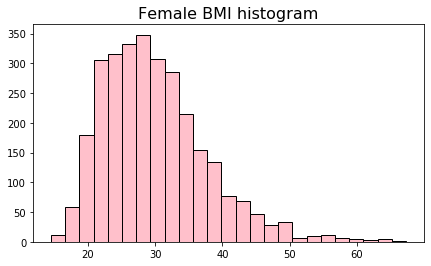

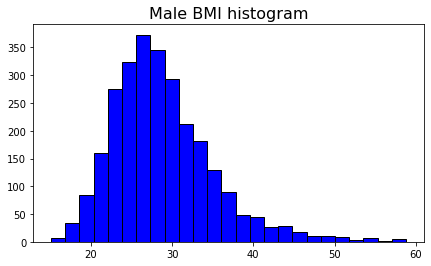

In [15]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()

### QUESTION 2: 
Use an example to explain A/B testing by finding Emperical p-value using A/B Testing

### A/B Testing: 
- Like any type of scientific testing, A/B testing is basically statistical hypothesis testing, or, in other words, statistical inference. It is an analytical method for making decisions that estimates population parameters based on sample statistics. You start the A/B testing process by making a claim (hypothesis)
- A/B testing helps you avoid unnecessary risks by allowing you to target your resources for maximum effect and efficiency, which helps increase ROI whether it be based on short-term conversions, long-term customer loyalty or other important metrics. External factors can affect the results of your test.

STEPS:
- Data Cleaning 
- Average calculation for approximation Salaries
- Running the shuffle process for 500 times
- Finding the Male Mean value for shuffled data
- Finding the Female mean values for shuffles data
- Caluclating the Difference of Male and Female suffled mean
- Calucalting the Male mean of original data
- Calucalting the Female mean of orignal data
- Finding the Difference of male mean and female mean
- Calucalting the Emperical_P value

Emperical_P value  :  1.002004008016032


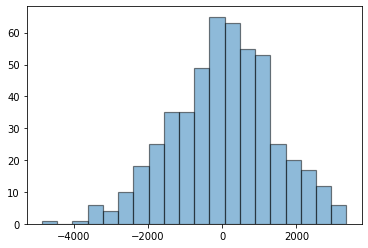

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
df=pd.read_csv('multipleChoiceResponses.csv')
male_data=pd.notnull(df["Q9"]) 
shuffles_mean_diff=[]
new_df=df[male_data] 
cleaning = new_df[(new_df.Q1 != 'Prefer not to say') & (new_df.Q1 != 'Prefer to self-describe') 
& (new_df.Q9 != 'I do not wish to disclose my approximate yearly compensation')]
cleaning_data=cleaning[['Q1','Q9']][1:]
Avg_dictonary = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000,
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500,
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000,
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000,
       '500,000+':500000,'500,000':500000}
cleaning_data['Avg_salary'] = cleaning_data['Q9'].apply(lambda value: Avg_dictonary[value])
clean=cleaning_data[['Q1','Avg_salary']]
for shuff in range(500):
    shuffle_data=clean.sample(len(clean),replace=False)['Q1'].reset_index()['Q1']
    frame = { 'shuffle_gender':shuffle_data } 
    result = pd.DataFrame(frame)
    cleaning_gender=clean['Q1'].reset_index()['Q1']
    cleaning_salary=clean['Avg_salary'].reset_index()['Avg_salary']
    result['Avg_salary']=cleaning_salary
    result['original_gender']=cleaning_gender
    shuffle_group=result.groupby('shuffle_gender')
    Shuffle_male_mean=shuffle_group.get_group('Male')['Avg_salary'].mean() 
    Shuffle_female_mean=shuffle_group.get_group('Female')['Avg_salary'].mean()
    shuffles_mean_diff.append(Shuffle_male_mean-Shuffle_female_mean)
males_females=cleaning_data.groupby('Q1')
male_salary_avg=males_females.get_group('Male')['Avg_salary'].mean()
female_salary_avg=males_females.get_group('Female')['Avg_salary'].mean()
Avg_diff_Male_Female=male_salary_avg-female_salary_avg
pyplot.hist(shuffles_mean_diff,bins=20,alpha=0.5,edgecolor='black', linewidth=1.2)
shuffles_mean_diff=np.array(shuffles_mean_diff)
empirical_P=np.count_nonzero(shuffles_mean_diff <= Avg_diff_Male_Female ) / shuff 
print("Emperical_P value  : ",empirical_P)


### QUESTION 3: Explain the purposes and the steps of bootstrap using an example.
    
###### BOOTSTRAPPING:
The use of re-sampled data to perform statistucal inference. The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset 
with replacement. The bootstrap method involves iteratively resampling a dataset with replacement

###### Purpose of Bootstrapping: 
The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement. It can be used to estimate summary statistics such as the mean or standard deviation.

###### Procedure:
1. Choose a number of bootstrap samples to perform
2. Choose a sample size
3. For each bootstrap sample
4. Draw a sample with replacement with the chosen size
5. Calculate the statistic on the sample
6. Calculate the mean of the calculated sample statistics.


The length of the Bootstrap smaple is : 500 

The mean of the Bootstrap sample:  Bootstrap_values    6979.676817
dtype: float64
The median of the Bootstrap sample:  6939.959701945485
The Standard Deviation of the Bootstrap sample:  Bootstrap_values    2067.619947
dtype: float64


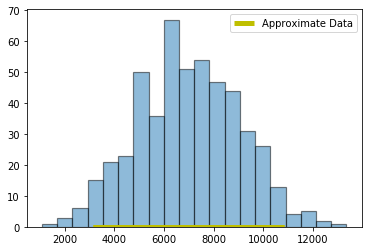

In [49]:
import pandas as pd
import numpy as np
from numpy import median

import statistics

import matplotlib.pyplot as pyplot
%matplotlib inline
from sklearn.utils import resample

df = pd.read_csv('multipleChoiceResponses.csv')
female = len(df[df['Q1']== 'Female'])
male = df[df.Q1 == 'Male'].index

random_indices = np.random.choice(male,female, replace=False)
females = df[df.Q1 == 'Female'].index
undersample_indices = np.concatenate([females,random_indices])
under_sample = df.loc[undersample_indices]
#The final data set after doing the under sampling will be stored in the new dataframe.
#new_df= under_sample.sample(n = 500, replace = False)


boot = resample(under_sample, replace=True, n_samples=5000, random_state=1)

#print('Bootstrap Sample: %s' % boot)

# out of bag observations
oob = [x for x in under_sample if x not in boot]


#Filtering the data for only male employees
gender_male = boot[boot['Q1'] == "Male"]

#Removing Null values from the male data
male_data = gender_male[gender_male['Q9'].notnull()]

#Removing any text information from male data
df_choice = male_data[male_data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

#As the given income is in range, Splitting the income after hyphen and forming 2 columns with data before and after hyphen
df_choice = df_choice['Q9'].str.split('-',n = 2,expand=True)

#Choosing the income after hyphen as the final income
df_choice["salary"]= df_choice[1] 

#Replacing the comma in the income and dropping the column if any NULL values occur.
male_income = df_choice["salary"].str.replace(',', '').dropna().astype(int)

#Filtering the data for only Female employees
gender_female = boot[boot['Q1'] == "Female"]

#Removing Null values from the Female data
female_data = gender_female[gender_female['Q9'].notnull()]

#Removing any text information from Female data
df_choice = female_data[female_data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

df_choice = df_choice['Q9'].str.split('-',n = 2,expand=True)
df_choice["salary"]= df_choice[1] 
female_income = df_choice["salary"].str.replace(',', '').dropna().astype(int)

#caluclate the means
mean1, mean2 = np.mean(male_income), np.mean(female_income)

t_stat = (mean1 - mean2)

new_data = boot[boot['Q9'].notnull()]

#Removing any text information from male data
df_choice = new_data[new_data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

df_choice = df_choice['Q9'].str.split('-',n = 2,expand=True)

#Choosing the income after hyphen as the final income
df_choice["salary"]= df_choice[1] 

new_data = df_choice["salary"].str.replace(',', '').dropna().astype(int)

boot1 = resample(new_data, replace=True, n_samples=5000, random_state=1)

#print('Bootstrap Sample: %s' % boot)

# out of bag observations
oob1 = [x for x in new_data if x not in boot1]
#print('OOB Sample: %s' % oob)

print("The length of the Bootstrap smaple is :", len(boot1),"\n")
print("The mean of the Bootstrap sample: ", np.mean(boot1))
print("The median of the Bootstrap sample: ", np.median(boot1))
print("The Standard Deviation of the Bootstrap sample: ", np.std(boot1))

pyplot.hlines((0,0),left_tale,right_tale, colors='y', linestyles='solid',linewidth=5, label='Approximate Data') 
pyplot.hist(oob1)

### QUESTION : 4 Explain what is Confidence Interval and how to check the Confidence Level.
##### What is Confidence Interval
- A 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. This is not the same as a range that contains 95% of the values. But only a tiny fraction of the values in the large sample on the right lie within the confidence interval. A confidence interval is a range of values, derived from sample statistics, that is likely to contain the value of an unknown population parameter

#### Caluclating Confidence Level of the sampel population data
- Determine the confidence level and find the appropriate z*-value.
- Find the sample mean
- Multiply z* times and divide that by the square root of n. This calculation gives you the margin of erro
- Take Mean plus or minus the margin of error to obtain the CI. The lower end of the CI is Mean minus the margin of error, whereas the upper end of the CI is Mean plus the margin of error.


In [87]:
import pandas as pd
import numpy as np
from numpy import median
import math
import statistics
from scipy.stats import t

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import sem, t
from scipy import mean

df = pd.read_csv('multipleChoiceResponses.csv')
female = len(df[df['Q1']== 'Female'])
male = df[df.Q1 == 'Male'].index
#This data has more male and less female samples. To randomly pick equal number of male samples as female samples from the total population we can do :
random_indices = np.random.choice(male,female, replace=False)
females = df[df.Q1 == 'Female'].index
undersample_indices = np.concatenate([females,random_indices])
under_sample = df.loc[undersample_indices]
#The final data set after doing the under sampling will be stored in the new dataframe.
new_df= under_sample.sample(n = 500, replace = False)

#Filtering the data for only male employees
gender_male = new_df[new_df['Q1'] == "Male"]

#Removing Null values from the male data
male_data = gender_male[gender_male['Q9'].notnull()]

#Removing any text information from male data
df_choice = male_data[male_data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

#As the given income is in range, Splitting the income after hyphen and forming 2 columns with data before and after hyphen
df_choice = df_choice['Q9'].str.split('-',n = 2,expand=True)

#Choosing the income after hyphen as the final income
df_choice["salary"]= df_choice[1] 

#Replacing the comma in the income and dropping the column if any NULL values occur.
male_income = df_choice["salary"].str.replace(',', '').dropna().astype(int)

#Filtering the data for only Female employees
gender_female = new_df[new_df['Q1'] == "Female"]

#Removing Null values from the Female data
female_data = gender_female[gender_female['Q9'].notnull()]

#Removing any text information from Female data
df_choice = female_data[female_data['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

df_choice = df_choice['Q9'].str.split('-',n = 2,expand=True)
df_choice["salary"]= df_choice[1] 
female_income = df_choice["salary"].str.replace(',', '').dropna().astype(int)

#caluclate the means
mean1, mean2 = np.mean(male_income), np.mean(female_income)

# calculate sample standard deviations
std1, std2 = np.std(male_income, ddof=1), np.std(female_income, ddof=1)

# calculate standard errors
n1, n2 = len(male_income), len(female_income)
se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)

# standard error on the difference between the samples
sed = math.sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean1 - mean2)

# degrees of freedom
df = len(male_income) + len(female_income) - 2

# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df)

# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

confidence = 0.95
data = np.concatenate([male_income,female_income])

n = len(data)
m = mean(data)
std_err = sem(data)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = m - h

mean= mean(data)
    
#mean = average(data)
# evaluate sample variance by setting delta degrees of freedom (ddof) to
# 1. The degree used in calculations is N - ddof
stddev = std(data, ddof=1)
# Get the endpoints of the range that contains 95% of the distribution
t_bounds = t.interval(0.95, len(data) - 1)
# sum mean to the confidence interval
ci = [mean + critval * stddev / sqrt(len(data)) for critval in t_bounds]
print ("Mean: %f" % mean)
print ("Confidence Interval Levels 95%%: %f, %f" % (ci[0], ci[1]))

# return everything

print('\ndegrees of freedom=%d, \ncritical value=%.3f' % (df, cv))

# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal or near to zero and will have Alternative hypothesis.')
else:
    print('Reject the null hypothesis that the means are equal or near to zero and will have Alternative hypothesis..')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal or near to zero and will have Alternative hypothesis..')
else:
    print('Reject the null hypothesis that the means are equal or near to zero and will have Alternative hypothesis..')


Mean: 57468.750000
Confidence Interval Levels 95%: 75.098663, 88.643890

degrees of freedom=318, 
critical value=1.650
Reject the null hypothesis that the means are equal or near to zero and will have Alternative hypothesis..
Reject the null hypothesis that the means are equal or near to zero and will have Alternative hypothesis..


### QUESTION 5: Explain what is Loss Function, and how to use Gradient Descent to minimizing loss function

#### Loss Function:

- A loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. It is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do. Zero-one loss is a common loss function used with classification learning. It assigns 0 to loss for a correct classification and 1 for an incorrect classification.

The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases. ... So, the gradient descent allows to save a lot of time on calculations.

A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.
The loss function gives the training error when
using parameters w, denoted L(w).
• Also called cost function
Optimization techniques for Gradient Descent. Gradient Descent is an iterative optimiZation algorithm, used to find the minimum value for a function. The general idea is to initialize the parameters to random values, and then take small steps in the direction of the “slope” at each iteration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

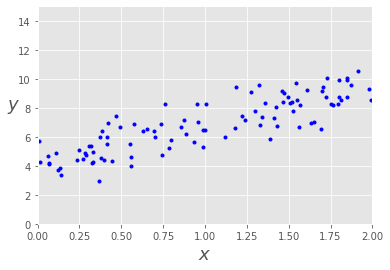

In [2]:
#Generate some data with theta value 3 and 4 by adding some gaussian noise to it.
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
#Let's plot our data to check the relation between X and Y

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [3]:
#This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.17858122]
 [2.66493427]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17858122],
       [9.50844976]])

[0, 2, 0, 15]

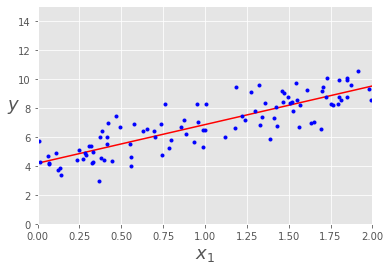

In [6]:
#Will plot the prediction line with the theta which is caluclated.
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

GradientDescent Loss function:

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions


In [7]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [8]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

In [9]:
#Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.047,
Theta1:          2.775
Final cost/MSE:  4730.262


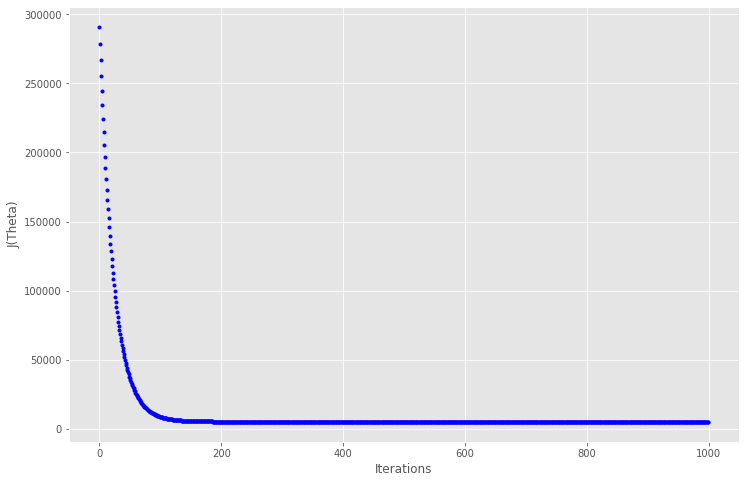

In [10]:
#Let's plot the cost history over iterations
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

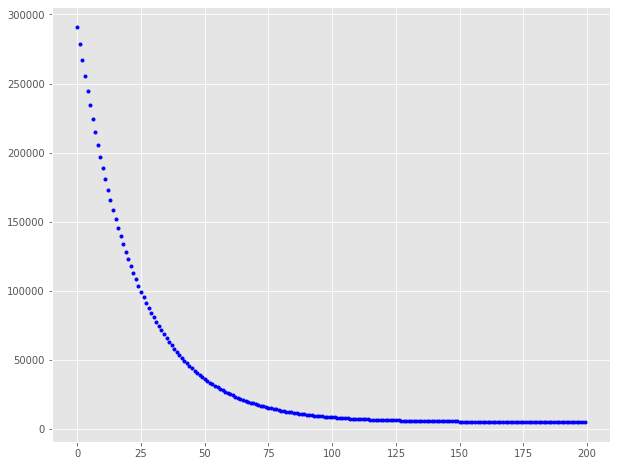

In [11]:
#After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

From the above fraph we can say that cost drops faster initially and then the gain in cost reduction is not as much, It would be great to see the effect of different learning rates and iterations together,Let us build a function which can show the effects together and also show how gradient decent actually is working

In [13]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

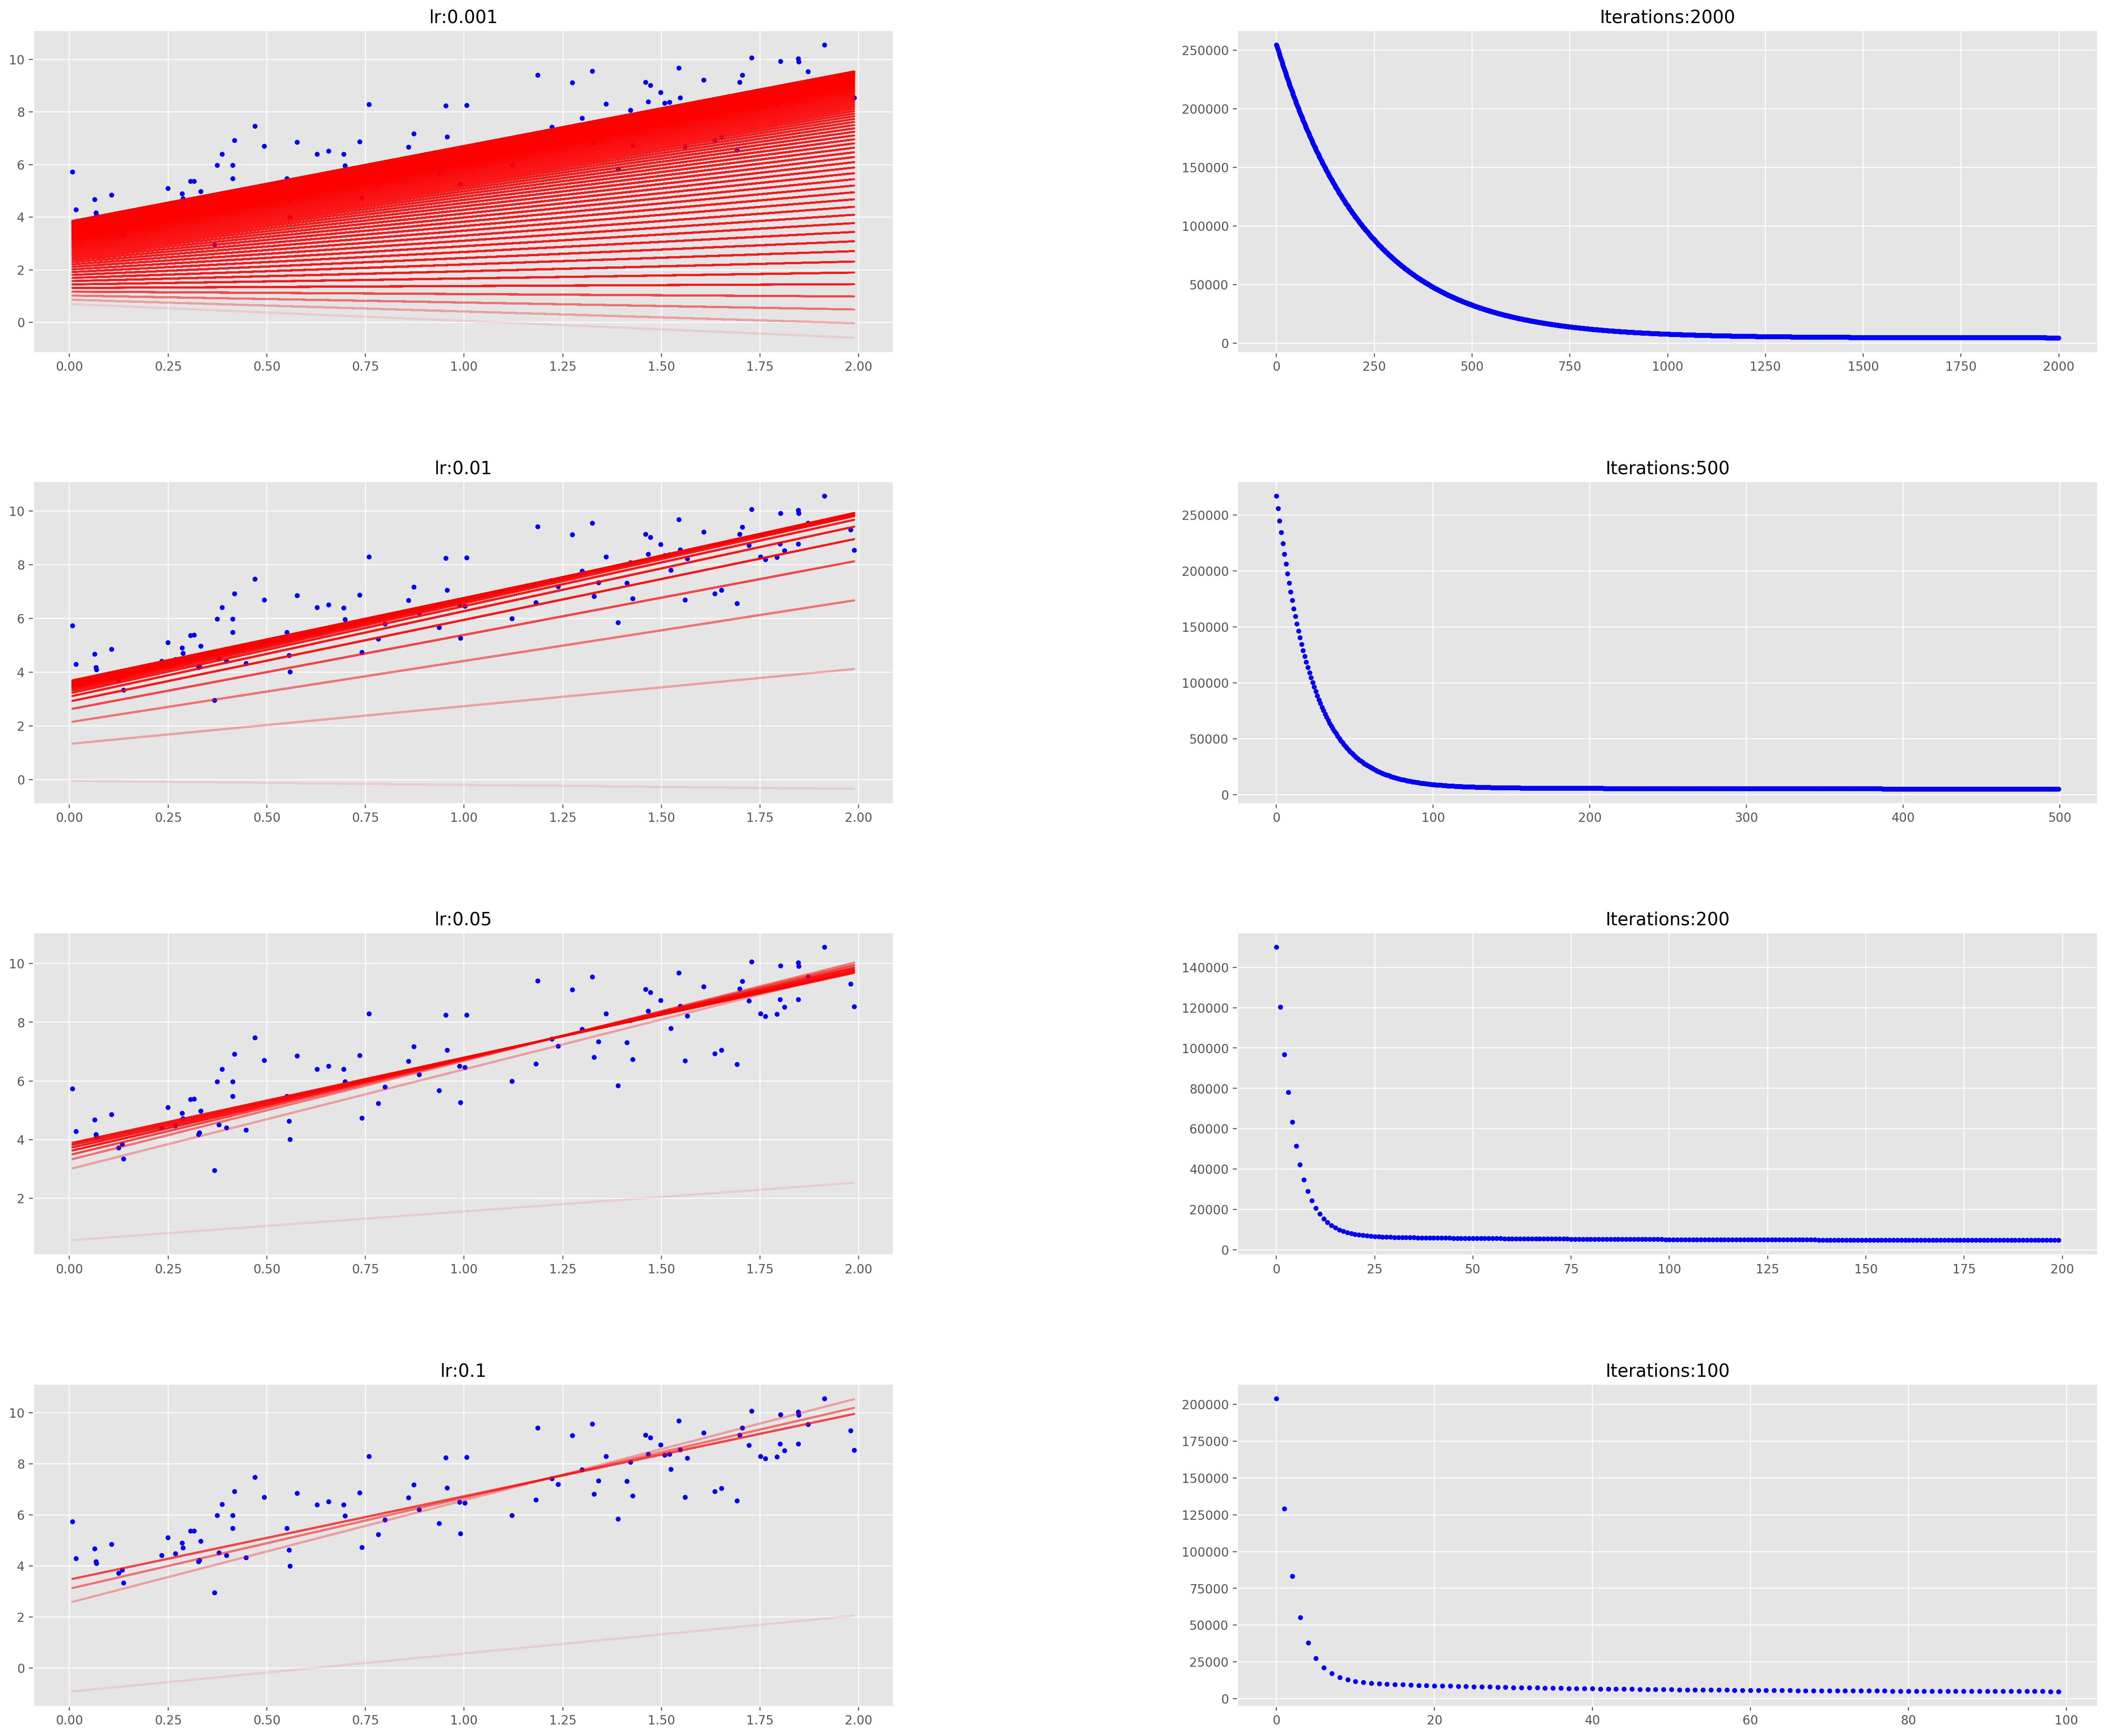

In [14]:
#Plot the graphs for different iterations and learning rates combination
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

It is very useful to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value. You can always plot Indiviual graphs to zoom in



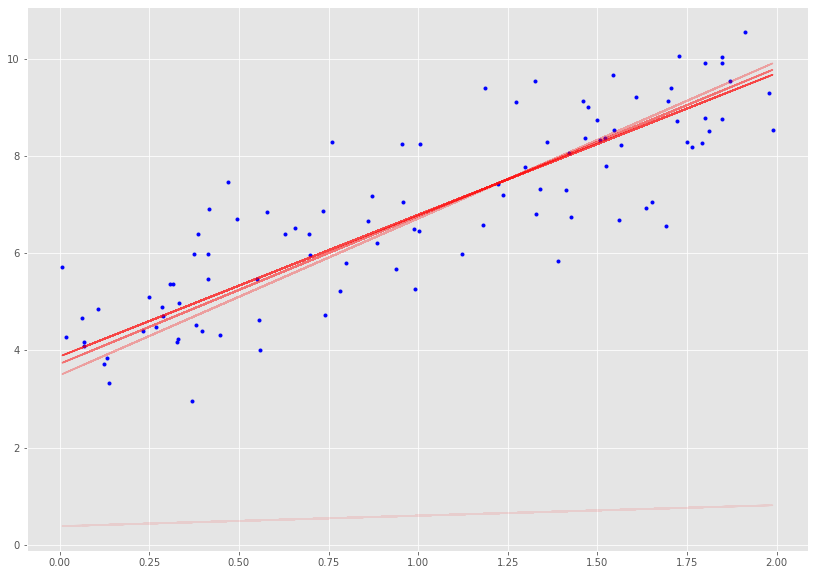

In [15]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

Batch gradient descent vs Stochastic gradient descent
Stochastic gradient descent (SGD or "on-line") typically reaches convergence much faster than batch (or "standard") gradient descent since it updates weight more frequently.

In [16]:
#Stochastic Gradient Descent
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [17]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.139,
Theta1:          2.664
Final cost/MSE:  43.193


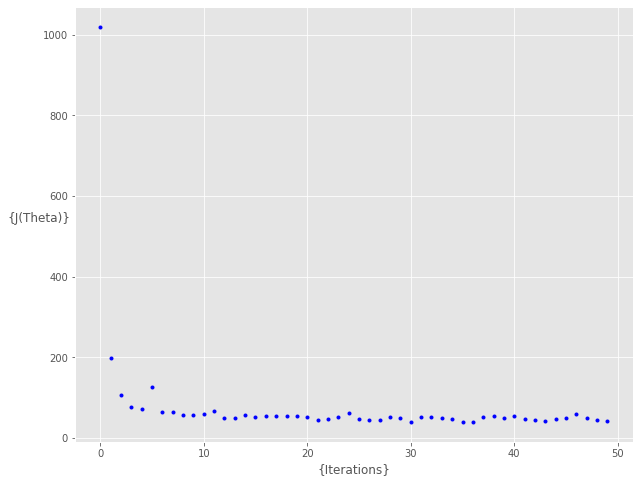

In [18]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

In [19]:
# Mini Batch Gradient Descent
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [20]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.149,
Theta1:          2.689
Final cost/MSE:  941.050


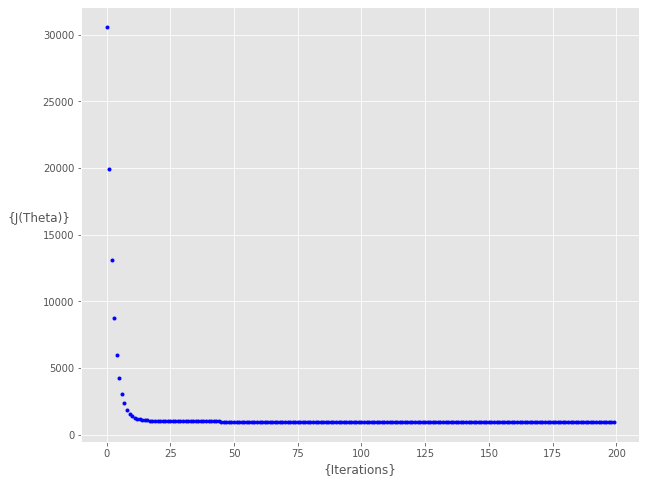

In [21]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=est, oob_score=True, verbose=1, n_jobs=n_cores)

# verbose = 2 -> prints out every tree progression
# rf = RandomForestClassifier(n_estimators=est, oob_score=True, verbose=2, n_jobs=n_cores)



X = np.nan_to_num(X)
rf2 = rf.fit(X, y)

In [4]:
# With our Random Forest model fit, we can check out the "Out-of-Bag" (OOB) prediction score:

print('--------------------------------', file=open(results_txt, "a"))
print('TRAINING and RF Model Diagnostics:', file=open(results_txt, "a"))
print('OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100))
print('OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100), file=open(results_txt, "a"))


# we can show the band importance:
bands = range(1,img_ds.RasterCount+1)

for b, imp in zip(bands, rf2.feature_importances_):
    print('Band {b} importance: {imp}'.format(b=b, imp=imp))
    print('Band {b} importance: {imp}'.format(b=b, imp=imp), file=open(results_txt, "a"))

    
# Let's look at a crosstabulation to see the class confusion. 
# To do so, we will import the Pandas library for some help:
# Setup a dataframe -- just like R
# Exception Handling because of possible Memory Error

try:
    df = pd.DataFrame()
    df['truth'] = y
    df['predict'] = rf.predict(X)

except MemoryError:
    print('Crosstab not available ')

else:
    # Cross-tabulate predictions
    print(pd.crosstab(df['truth'], df['predict'], margins=True))
    print(pd.crosstab(df['truth'], df['predict'], margins=True), file=open(results_txt, "a"))

OOB prediction of accuracy is: 99.53314659197012
Band 1 importance: 0.07422191283709235
Band 2 importance: 0.03138862335047076
Band 3 importance: 0.01232741814805193
Band 4 importance: 0.06724784717595128
Band 5 importance: 0.11994202487099442
Band 6 importance: 0.050658933643359196
Band 7 importance: 0.06543997268021191
Band 8 importance: 0.27292836274508814
Band 9 importance: 0.12041183266036815
Band 10 importance: 0.030058880237602194
Band 11 importance: 0.036830909145992574
Band 12 importance: 0.01929961375159746
Band 13 importance: 0.04317281009998762
Band 14 importance: 0.056070858653231984
